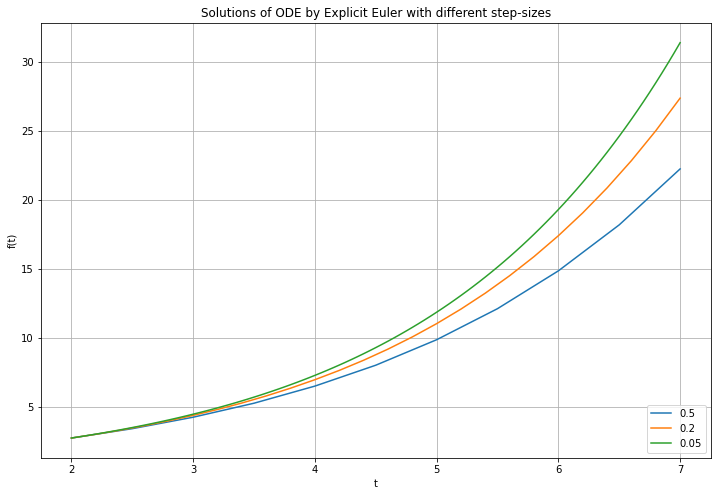

In [1]:
import math
import numpy as np
import matplotlib.pyplot as plt
from functionLibrary import fwdEuler

f = lambda x, y: (y*math.log(y))/x

t1, s1 = fwdEuler(f, 2, 7, 0.5, 2.71828)
t2, s2 = fwdEuler(f, 2, 7, 0.2, 2.71828)
t3, s3 = fwdEuler(f, 2, 7, 0.05, 2.71828)

plt.figure(figsize = (12, 8))
plt.plot(t1, s1, label='0.5')
plt.plot(t2, s2, label = '0.2')
plt.plot(t3, s3, label = '0.05')
plt.title('Solutions of ODE by Explicit Euler with different step-sizes')
plt.xlabel('t')
plt.ylabel('f(t)')
plt.grid()
plt.legend(loc='lower right')
plt.show()


[2, 2.5, 3.0, 3.5, 4.0, 4.5, 5.0, 5.5, 6.0, 6.5, 7.0]
[2, 2.5, 3.0, 3.5, 4.0, 4.5, 5.0, 5.5, 6.0, 6.5, 7.0]


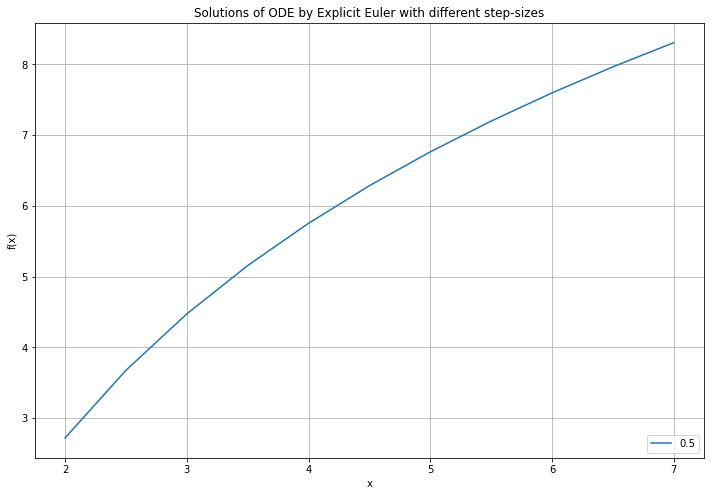

In [4]:
import math
import matplotlib.pyplot as plt
def eulerRaphson(g, dg, x0, e, n):
    iterCount = [g(x0)] #this enlists the f(x_i)'s for plotting and tabulating purposes
    xiCount = []
    for i in range(n):
        xnew = x0 - g(x0)/dg(x0)
        iterCount.append(g(xnew))
        xiCount.append(xnew)
        if abs(xnew - x0)<e: break
        x0 = xnew
    return xnew


f = lambda x, y: (y*math.log(y))/x

h = 0.5
h1 = 0.0001
g = lambda z: z - 2.71828 - h*(f(2+h, z))
dg = lambda z: (g(z+h1)-g(z-h1))/(2*h1)
eulerRaphson(g, dg, 1, 1e-10, 100)

def bwdEuler(f, a, b, h, initial):
    t = []
    for i in range(math.ceil((b-a)/h)+1):
        t.append(a)
        a = a + h
    s = []
    for i in range(len(t)):
        s.append(0)
    s[0] = 2.71828
    print(t)
    for i in range(0, len(t)-1):
        s[i + 1] = s[i] + h*f(t[i+1], eulerRaphson(g, dg, 1, 1e-05, 100))
    return t, s


bwdEuler(f, 2, 7, 0.5, 2.71828)
t1, s1 = bwdEuler(f, 2, 7, 0.5, 2.71828)
#t2, s2 = bwdEuler(f, 2, 7, 0.2, 2.71828)
#t3, s3 = bwdEuler(f, 2, 7, 0.05, 2.71828)

plt.figure(figsize = (12, 8))
plt.plot(t1, s1, label='0.5')
#plt.plot(t2, s2, label = '0.2')
#plt.plot(t3, s3, label = '0.05')

plt.title('Solutions of ODE by Explicit Euler with different step-sizes')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.grid()
plt.legend(loc='lower right')
plt.show()


In [ ]:
import math



f = lambda x, y: (y*math.log(y))/x

def fwdEuler(f, a, b, h, initial):
    t = []
    for i in range(math.ceil(b/h)+1):
        t.append(a)
        a = a + h
    s = []
    for i in range(len(t)):
        s.append(0)
    s[0] = initial
    for i in range(0, len(t) - 1):
        s[i + 1] = s[i] + h*f(t[i], s[i])
    print(s)
    #return t, s

fwdEuler(f, 2, 7, 0.5, 2.71828)

In [ ]:
import math
import matplotlib.pyplot as plt
def eulerRaphson(g, dg, x0, e, n):
    iterCount = [g(x0)] #this enlists the f(x_i)'s for plotting and tabulating purposes
    xiCount = []
    for i in range(n):
        xnew = x0 - g(x0)/dg(x0)
        iterCount.append(g(xnew))
        xiCount.append(xnew)
        if abs(xnew - x0)<e: break
        x0 = xnew
    return xnew


f = lambda x, y: (y*math.log(y))/x

h = 0.5
h1 = 0.0001
g = lambda z: z - 2.71828 - h*(f(2+h, z))
dg = lambda z: (g(z+h1)-g(z-h1))/(2*h1)
eulerRaphson(g, dg, 1, 1e-05, 100)